In [2]:
import numpy as np
import matplotlib.pyplot as plt
from algoritmer import bfgs
import tests as TEST


In [3]:
def conv_plot(y):
    plt.plot(y)
    plt.title("Convergence",fontsize=20)
    plt.xlabel("Iterations",fontsize=14)
    plt.ylabel(r"$log \Vert E(X) \Vert $",fontsize=14)
    plt.yscale("log")

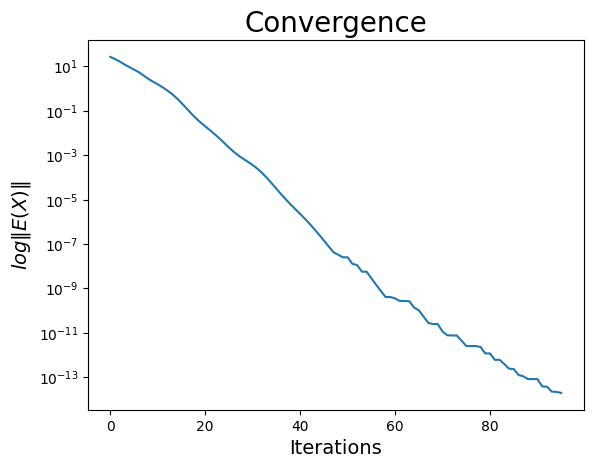

In [4]:
ts =  TEST.P25

sol = np.array([
    [2, 2, -1.5],
    [-2, 2, -1.5],
    [-2, -2, -1.5],
    [2, -2, -1.5]
]).flatten()

x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_sol=True, solution=sol)

conv_plot(conv)


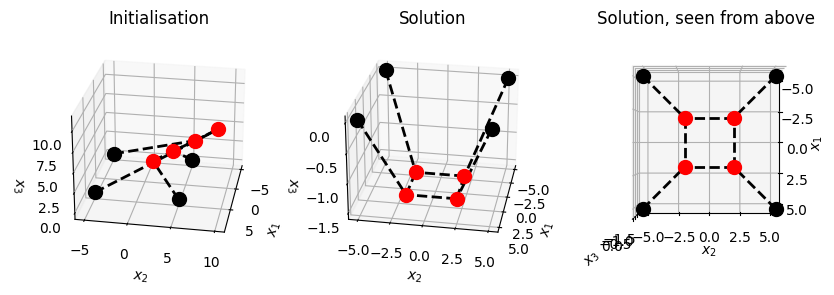

In [5]:
fig, ax = ts.plot(res,x0)


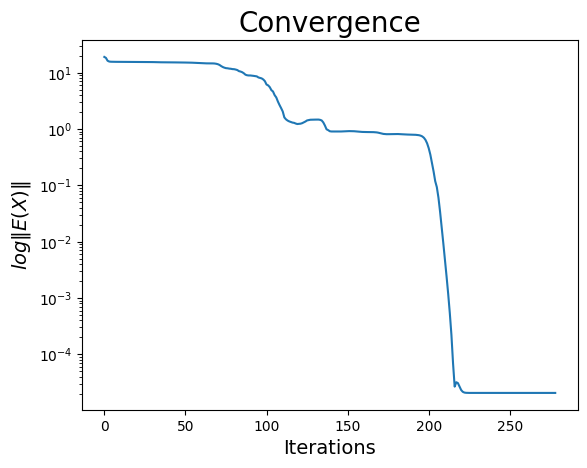

In [6]:
ts =  TEST.P69
s = 0.70970
t = 9.54287
sol = np.array([
    [-s, 0, t],
    [0, -s, t],
    [s, 0, t],
    [0, s, t]
]).flatten()

x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=1000, convergence_sol=True, solution=sol)
conv_plot(conv)

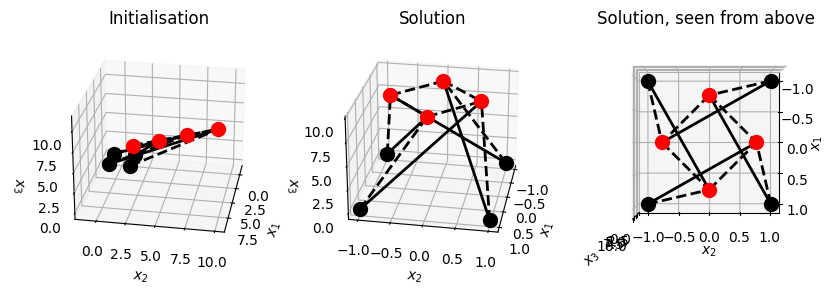

In [7]:
fig, ax = ts.plot(res, x0)

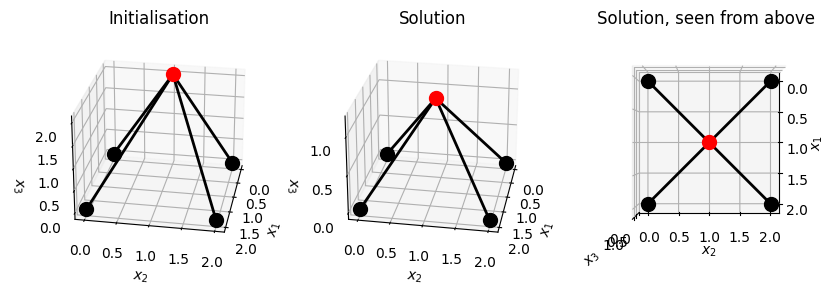

In [8]:
ts =  TEST.LOCALMIN
x0 = np.arange(3 * len(ts.free_weights))
res = bfgs(x0, ts.func, ts.grad, Niter=1000)
fig, ax = ts.plot(res, x0)


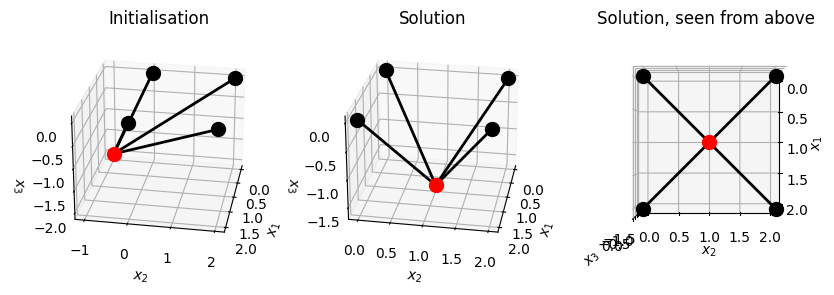

In [9]:
ts =  TEST.LOCALMIN
x0 = -np.arange(3 * len(ts.free_weights))
res = bfgs(x0, ts.func, ts.grad, Niter=1000)
fig, ax = ts.plot(res, x0)


# of BFGS iterations: 1000	 mu: 1 
# of BFGS iterations: 48	 mu: 1.5 
# of BFGS iterations: 58	 mu: 18.0 
# of BFGS iterations: 70	 mu: 216.0 
# of BFGS iterations: 179	 mu: 2592.0 
# of BFGS iterations: 49	 mu: 31104.0 
# of BFGS iterations: 200	 mu: 373248.0 
# of BFGS iterations: 420	 mu: 4478976.0 
# of BFGS iterations: 48	 mu: 26873856.0 
# of BFGS iterations: 39	 mu: 322486272.0 


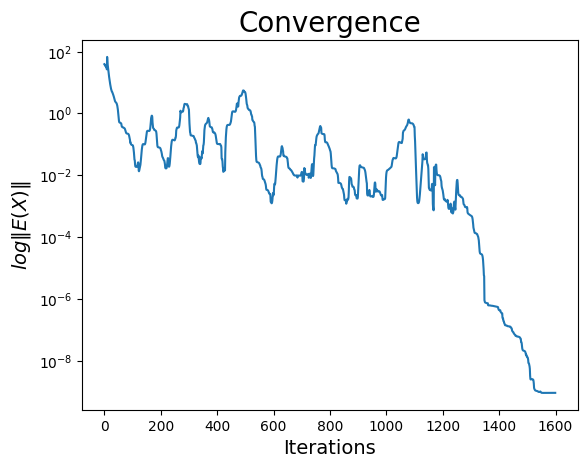

In [10]:
ts = TEST.SANITYCHECK
x0 = np.arange(3 * len(ts.free_weights))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f'# of BFGS iterations: {num}\t mu: {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)

    if np.linalg.norm(res - prev) < 1e-12:
        break
    prev = res

sol = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000)
res, conv = bfgs(x0, ts.func(mu), ts.grad(mu), Niter=10000, convergence_sol=True, solution=sol)
conv_plot(conv)


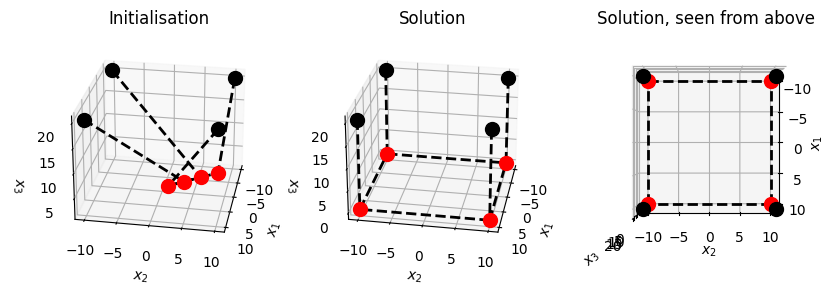

In [11]:
fig, ax = ts.plot(res, x0)

# of BFGS iterations: 1000	 mu: 1 
# of BFGS iterations: 284	 mu: 1.5 
# of BFGS iterations: 403	 mu: 9.0 
# of BFGS iterations: 468	 mu: 54.0 
# of BFGS iterations: 476	 mu: 324.0 
# of BFGS iterations: 1000	 mu: 1944.0 
# of BFGS iterations: 280	 mu: 2916.0 
# of BFGS iterations: 301	 mu: 17496.0 
# of BFGS iterations: 334	 mu: 104976.0 
# of BFGS iterations: 447	 mu: 209953 


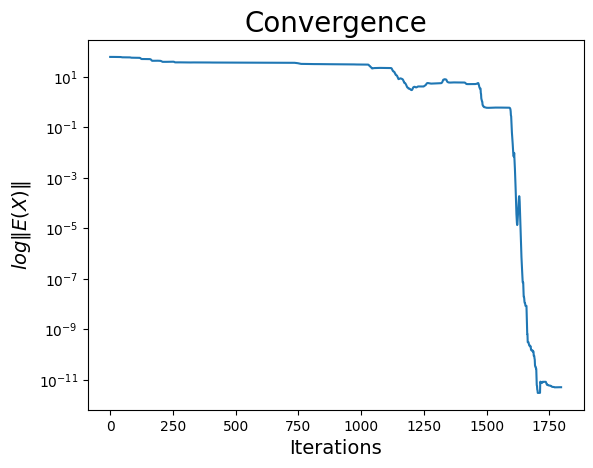

In [12]:
ts = TEST.FREESTANDING
x0 = np.arange(3 * len(ts.free_weights))

# x0 = np.random.uniform(0, 10, size=(3 * len(ts.free_weights)))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f'# of BFGS iterations: {num}\t mu: {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 209953)

    if np.linalg.norm(res - prev) < 1e-12:
        break
    prev = res

sol = bfgs(res, ts.func(mu), ts.grad(mu), Niter=10000)
res, conv = bfgs(x0, ts.func(mu), ts.grad(mu), Niter=10000, convergence_sol=True, solution=sol)

conv_plot(conv)

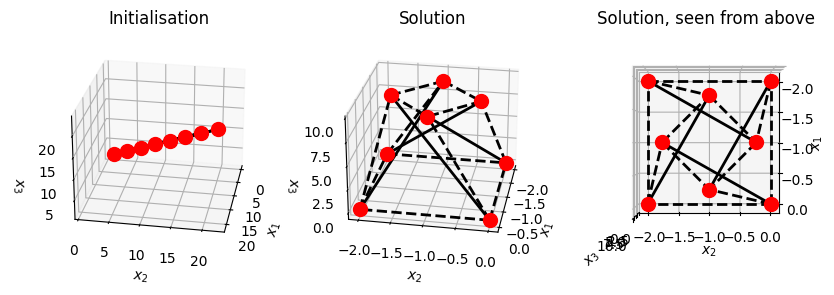

In [13]:
fig, ax = ts.plot(res, x0)

# of BFGS iterations: 1000	 mu: 1 
# of BFGS iterations: 927	 mu: 1.5 
# of BFGS iterations: 682	 mu: 4.5 
# of BFGS iterations: 856	 mu: 13.5 
# of BFGS iterations: 730	 mu: 40.5 
# of BFGS iterations: 754	 mu: 121.5 
# of BFGS iterations: 899	 mu: 364.5 
# of BFGS iterations: 768	 mu: 1093.5 
# of BFGS iterations: 652	 mu: 3280.5 
# of BFGS iterations: 1000	 mu: 9841.5 


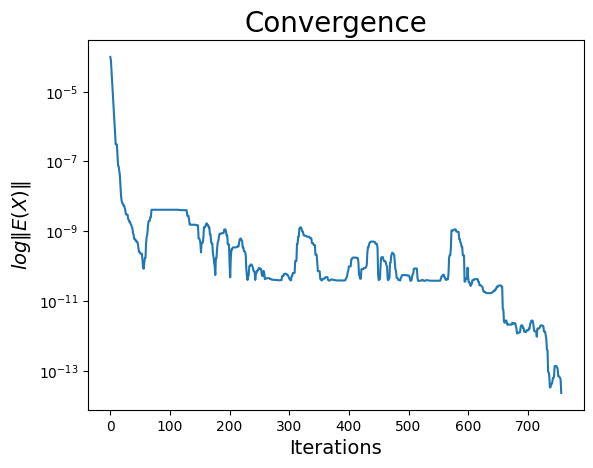

In [14]:
ts = TEST.STORIES(2)
x0 = np.arange(3 * len(ts.free_weights))

mu = 1
prev = x0
for i in range(10):
    res, num = bfgs(prev, ts.func(mu), ts.grad(mu), Niter=1000, return_iteration=True)
    print(f'# of BFGS iterations: {num}\t mu: {mu} ')

    mu *= 1.5
    if num < 1000:
        mu *= 2
    if num < 500:
        mu *= 2
    if num < 250:
        mu *= 2

    mu = min(mu, 1e10)

    if np.linalg.norm(res - prev) < 1e-12:
        break

    prev = res

res, conv = bfgs(res, ts.func(mu), ts.grad(mu), Niter=1000, convergence_plot=True)
conv_plot(conv)

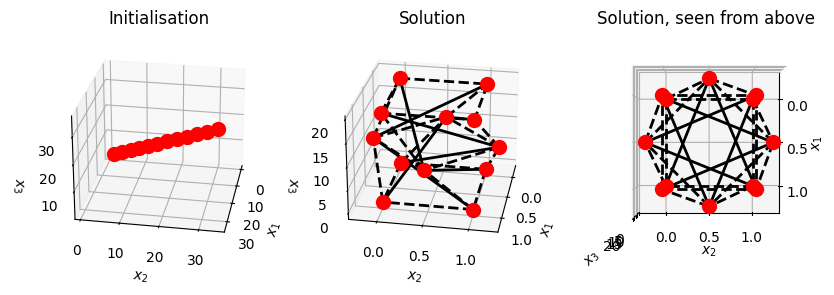

In [15]:
fig, ax = ts.plot(res, x0)